# Kozeny-Carman equation

\begin{equation}
    K = \dfrac{d_p^2}{180}\dfrac{\theta^3}{(1-\theta)^2} \dfrac{\rho g }{\mu}
\end{equation}

In [3]:
%reset -f

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

#Globals
rho = 1000.  #kg/m3
g   = 9.81   #cm/s2
mu  = 0.001  #Ns/m2
dp  = 4.4E-4 #m

def KozenyCarman(theta):
    return dp**2 * theta**3 * rho * g / (180 * (1-theta)**2 * mu)

def Chen2010(theta):
    perm = 810.0*(theta)**3.1   # Original equation
    perm = perm * 9.869233E-13         # Darcy >> m2
    Kcon = perm * rho * g / mu  # Permeability >> Hydraulic cond.
    return Kcon

def Chen2009(theta):
    perm = 1600.0*(theta)**3.7   # Original equation
    perm = perm * 9.869233E-13         # Darcy >> m2
    Kcon = perm * rho * g / mu  # Permeability >> Hydraulic cond.
    return Kcon

def findTheta(K_expected=1.0E-8):
    
    def minimizer(theta):
        K_init = KozenyCarman(theta)
        return (K_init - K_expected)**2
    
    solution = root(minimizer,0.1)
    print(solution.message + f" >> Porosity = {solution.x}")
    return solution.x

In [94]:
rc = plt.rcParams

rc["font.family"] = "ubuntu"
rc["axes.labelsize"] = 12
rc["axes.labelweight"] = 'bold'
rc["axes.labelcolor"] = 'k'
rc["axes.labelpad"] = 10
rc["legend.fontsize"] = 12
rc["axes.spines.right"] = False
rc["axes.spines.top"] = False

In [96]:
def BiofilmModel(theta,thetaf):
    theta0 = np.max(theta)
    nr = theta/theta0
    nr0 = thetaf/theta0
    k0 = KozenyCarman(theta)
    kf = KozenyCarman(thetaf)
    kmin = kf/k0
    nn = (nr-nr0)/(1-nr0)
    k = (1+(1+kmin)) * (np.power(nn,1.8) + kmin)
    return k*k0

def ColloniesModel(theta,thetaf):
    theta0 = np.max(theta)
    a = -1.8
    nr = theta/theta0
    nr0 = thetaf/theta0
    nn = (nr-nr0)/(1-nr0)
    
    k = (a * np.power(nn,3.0)) + ((1-a) * np.power(nn,2.0))
    k0 = KozenyCarman(theta)
    
    return k*k0

In [120]:
def KnappCivan1988(theta):
    theta0 = np.max(theta)
    nr = theta/theta0
    k = np.power(nr,3.0)
    k0 = KozenyCarman(theta)
    return k*k0

In [97]:
p = 0.35
print("Kozeny-Carman:  {:10.3E}".format(KozenyCarman(p)))
print("Chen2009:       {:10.3E}".format(Chen2009(p)))
print("Chen2010:       {:10.3E}".format(Chen2010(p)))
print("Biofilm:        {:10.3E}".format(BiofilmModel(p,0.05)))
print("Collonies:      {:10.3E}".format(ColloniesModel(p,0.05)))

Kozeny-Carman:   1.071E-03
Chen2009:        3.185E-04
Chen2010:        3.027E-04
Biofilm:         2.146E-03
Collonies:       1.071E-03


In [126]:
por0 = 0.04423837
porosity = np.linspace(por0,0.45,100)
hydrCond = KozenyCarman(porosity)

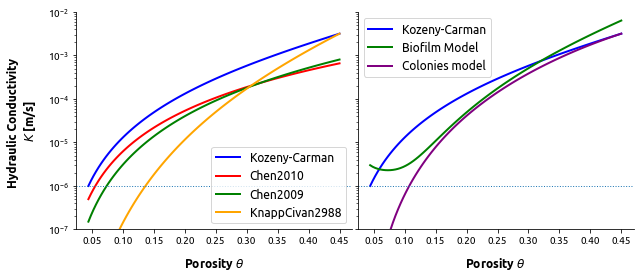

In [127]:
fig,axs = plt.subplots(1,2,figsize=(10,4),sharey=True,sharex=True,gridspec_kw={'wspace':0.02});
ax=axs[0]
ax.plot(porosity,KozenyCarman(porosity),lw=2,c="blue",label='Kozeny-Carman')
ax.plot(porosity,Chen2010(porosity),lw=2,c="red",label="Chen2010")
ax.plot(porosity,Chen2009(porosity),lw=2,c="green",label="Chen2009")
ax.plot(porosity,KnappCivan1988(porosity),lw=2,c="orange",label="KnappCivan2988")
ax.set_ylabel("Hydraulic Conductivity \n$K$ [m/s]")

ax=axs[1]
ax.plot(porosity,KozenyCarman(porosity),lw=2,c="blue",label='Kozeny-Carman')
ax.plot(porosity,BiofilmModel(porosity,por0),lw=2,c="green",label="Biofilm Model")
ax.plot(porosity,ColloniesModel(porosity,por0),lw=2,c="purple",label="Colonies model")

for ax in axs:
    ax.set(yscale='log')#,xscale='log')
    ax.set_xlabel("Porosity $\\theta$ ")
    ax.axhline(y=1.0E-6,lw=1,ls='dotted')
    ax.set(ylim=[1.0E-7,1.0E-2])
    ax.legend()
plt.show()

In [79]:
theta2 = findTheta(1.0E-6)

The solution converged. >> Porosity = [0.04423837]


In [7]:
print("{:.4E} m/s".format(KozenyCarman(0.35)))

1.0707E-03 m/s


In [123]:
from jupypft import attachmentRateCFT

In [124]:
katt,_ = attachmentRateCFT.attachmentRate(dp=1.0E-7,dc=4.4E-4,
    q=0.35E-3,
    theta=0.35,
    visco=0.001,
    rho_f=1000.,
    rho_p=1050.0,
    A=1.0E-20,
    T=298.0,
    alpha=0.0043273861959162,
    debug=True)

Diffusion coeff:  4.3654E-12
Darcy velocity:   3.5000E-04
Pore-water vel:   1.0000E-03
---
Happel parameter: 5.2527E+01
NR number:        2.2727E-04
NPe number:       3.5277E+04
NvW number:       2.4305E+00
NGr number:       3.1211E-06
---
etaD collector:   1.0409E-02
etaI collector:   1.9641E-05
etaG collector:   2.8626E-07
eta0 collector:   1.0429E-02
---
Attach rate   :   1.0000E-04


In [31]:
"{:.6E}".format(0.0043273861959162)

'4.327386E-03'

In [30]:
1.0E-4/katt

1.0000000000000002